# **Tugas Pra UTS** (2 Modeling)

In [2]:
!pip install numpy 
!pip install pandas
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=15476aa999a951669b129323a7612a54e266d3a53e2f59ba8856ada1e825b8e1
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/prosaindata/tugas/cleaneddata.csv', index_col=0)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,ancang implementasi sistem database distribusi...,sistem informasi akademik siakad sistem inform...
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,gerak kerja game real time strategy finite sta...,gerak kerja game milik genre rts real time str...


#Split Data

In [4]:
from sklearn.model_selection import train_test_split

X = df['abstrak_tokens']
y = df['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Feature Extraction : TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(554, 4881)

In [6]:
terms = vectorizer.get_feature_names_out()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate(terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))


        term       rank
4076  sistem  23.051906
701    citra  21.106837
854     data  20.648329
2709  metode  20.360294
1550   hasil  19.416384
...      ...        ...
3607   ratus   0.050905
1445    ghim   0.050905
1647    idle   0.045443
2578    mbps   0.045443
3543     qos   0.045443

[4881 rows x 2 columns]


#Oversamping : SMOTE

In [7]:
y_train.value_counts()

Komputasi    301
RPL          178
NLP           75
Name: Kelas, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Komputasi    301
RPL          301
NLP          301
Name: Kelas, dtype: int64

#Training Model

GridSearchCV

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.763 total time=   0.1s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.860 total time=   0.2s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.767 total time=   0.1s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.837 total time=   0.1s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.865 total time=   0.1s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.887 total time=   0.1s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.899 total time=   0.1s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.862 total time=   0.1s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.853 total time=   0.1s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.897 total time=   0.1s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.744 total time=   0.1s
[CV 2/10] END .....criterion=gini, max_depth=2

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [10]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.096161,0.021483,0.004958,0.001634,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.763196,0.859516,0.767218,0.836759,0.864537,0.886574,0.898796,0.862222,0.853333,0.896944,0.848910,0.045756,1
1,0.108739,0.006387,0.004209,0.000342,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.744096,0.777077,0.752029,0.783333,0.834167,0.833333,0.906481,0.858333,0.875000,0.908333,0.827218,0.057621,5
2,0.121169,0.019475,0.005034,0.001383,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.752430,0.760410,0.760860,0.808333,0.816667,0.875000,0.900000,0.858333,0.858333,0.891667,0.828203,0.053468,4
3,0.108536,0.006422,0.004316,0.000820,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.752205,0.768698,0.736130,0.791667,0.825000,0.841667,0.925000,0.833333,0.866667,0.883333,0.822370,0.057354,6
4,0.153499,0.048161,0.005632,0.001547,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.747993,0.749840,0.850573,0.802593,0.831667,0.869074,0.929352,0.860741,0.891389,0.928611,0.846183,0.061273,3
5,0.322500,0.104905,0.010700,0.004253,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.744096,0.710678,0.802074,0.758333,0.766667,0.850000,0.883333,0.808333,0.875000,0.891667,0.809018,0.060567,11
6,0.397844,0.100832,0.009688,0.004323,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.711212,0.719236,0.801940,0.758333,0.783333,0.850000,0.875000,0.800000,0.875000,0.908333,0.808239,0.064211,12
7,0.277247,0.068916,0.006343,0.000585,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.735988,0.719057,0.793832,0.758333,0.775000,0.858333,0.875000,0.825000,0.883333,0.883333,0.810721,0.059532,10
8,0.216005,0.045963,0.009733,0.005203,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.745179,0.748865,0.875345,0.775093,0.823704,0.858333,0.948333,0.838796,0.920185,0.939907,0.847374,0.071390,2
9,0.323148,0.069844,0.013948,0.008802,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.711437,0.710453,0.818695,0.775000,0.766667,0.833333,0.891667,0.816667,0.883333,0.925000,0.813225,0.069685,8


In [11]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
gini_10,"{'criterion': 'gini', 'max_depth': 10}",1,0.848910,0.045756
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",2,0.847374,0.071390
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",3,0.846183,0.061273
gini_30,"{'criterion': 'gini', 'max_depth': 30}",4,0.828203,0.053468
gini_20,"{'criterion': 'gini', 'max_depth': 20}",5,0.827218,0.057621
gini_None,"{'criterion': 'gini', 'max_depth': None}",6,0.822370,0.057354
log_loss_None,"{'criterion': 'log_loss', 'max_depth': None}",7,0.815726,0.058062
log_loss_20,"{'criterion': 'log_loss', 'max_depth': 20}",8,0.813225,0.069685
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",9,0.813216,0.058842


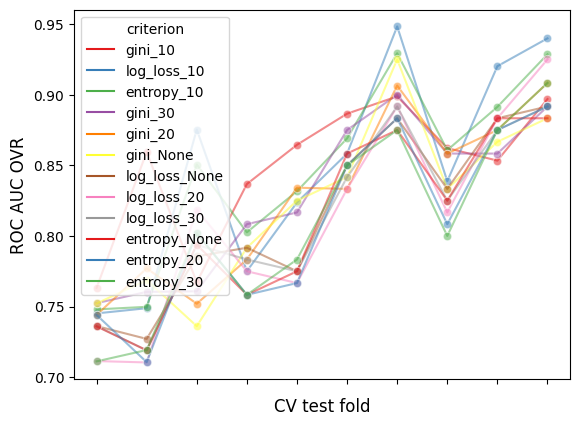

Correlation of models:
 criterion       gini_10  log_loss_10  entropy_10   gini_30   gini_20  \
criterion                                                              
gini_10        1.000000     0.491042    0.595761  0.828347  0.837601   
log_loss_10    0.491042     1.000000    0.973498  0.781137  0.805279   
entropy_10     0.595761     0.973498    1.000000  0.878581  0.864031   
gini_30        0.828347     0.781137    0.878581  1.000000  0.943069   
gini_20        0.837601     0.805279    0.864031  0.943069  1.000000   
gini_None      0.839121     0.770489    0.829374  0.950495  0.969163   
log_loss_None  0.633804     0.909858    0.950938  0.929433  0.884664   
log_loss_20    0.543207     0.966913    0.976130  0.845183  0.832330   
log_loss_30    0.599786     0.941748    0.971308  0.913358  0.876498   
entropy_None   0.583366     0.934629    0.954258  0.896515  0.854695   
entropy_20     0.524900     0.952933    0.957843  0.865099  0.823968   
entropy_30     0.612692     0.961928    

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose(),
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("ROC AUC OVR", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [13]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.5881622516556292, 0.9545454545454546, 'x[107] <= 0.0\ngini = 0.667\nsamples = 903\nvalue = [301, 301, 301]'),
 Text(0.4457781456953642, 0.8636363636363636, 'x[3408] <= 0.0\ngini = 0.607\nsamples = 500\nvalue = [144, 94, 262]'),
 Text(0.3650662251655629, 0.7727272727272727, 'x[390] <= 0.003\ngini = 0.569\nsamples = 463\nvalue = [142, 59, 262]'),
 Text(0.2433774834437086, 0.6818181818181818, 'x[2709] <= 0.011\ngini = 0.612\nsamples = 299\nvalue = [132, 43, 124]'),
 Text(0.15562913907284767, 0.5909090909090909, 'x[126] <= 0.018\ngini = 0.537\nsamples = 118\nvalue = [24, 20, 74]'),
 Text(0.12582781456953643, 0.5, 'x[167] <= 0.024\ngini = 0.438\nsamples = 101\nvalue = [16, 12, 73]'),
 Text(0.11258278145695365, 0.4090909090909091, 'x[1882] <= 0.025\ngini = 0.389\nsamples = 96\nvalue = [16, 7, 73]'),
 Text(0.09933774834437085, 0.3181818181818182, 'x[2827] <= 0.0\ngini = 0.348\nsamples = 92\nvalue = [12, 7, 73]'),
 Text(0.052980132450331126, 0.22727272727272727, 'x[3873] <= 0.029\ngini

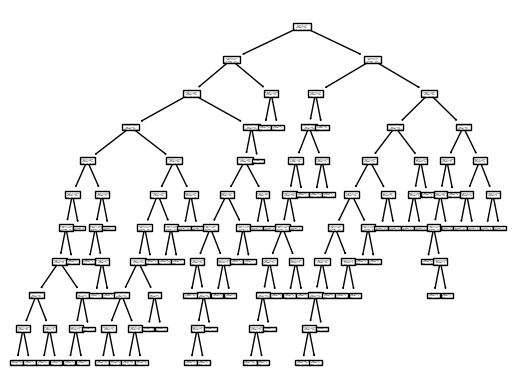

In [14]:
from sklearn import tree

tree.plot_tree(model) 

In [15]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  70


#Evaluation

In [16]:
predictions = model.predict(X_test_tfidf)

In [17]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[78 10 25]
 [22 16 11]
 [20  4 52]]


In [18]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


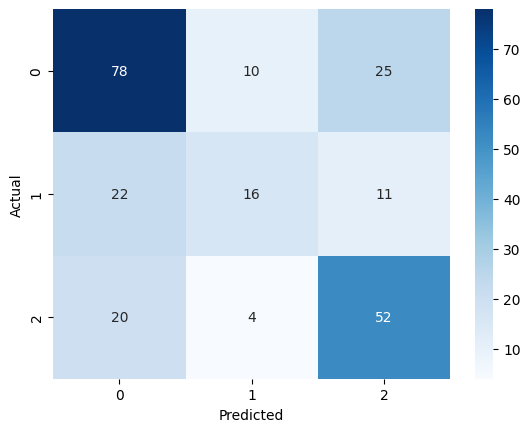

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

   Komputasi       0.65      0.69      0.67       113
         NLP       0.53      0.33      0.41        49
         RPL       0.59      0.68      0.63        76

    accuracy                           0.61       238
   macro avg       0.59      0.57      0.57       238
weighted avg       0.61      0.61      0.60       238



In [21]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

   Komputasi       0.65      0.69      0.67       113
         NLP       0.53      0.33      0.41        49
         RPL       0.59      0.68      0.63        76

    accuracy                           0.61       238
   macro avg       0.59      0.57      0.57       238
weighted avg       0.61      0.61      0.60       238



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6134453781512605
Precision score :  0.6071110262286733
Recall score :  0.6134453781512605
F1 score :  0.6037809898216694


#Export Model

In [24]:
import os

if not os.path.exists("model"):
    os.makedirs("model")


In [25]:

from joblib import dump

dump(model, filename="model/dtc-model-abstrak.joblib")
dump(vectorizer, filename="model/vectorizer_model_abstrak.joblib")

['model/vectorizer_model_abstrak.joblib']

#Demo 

In [26]:
title_input = input("Masukkan Abstrak Skripsi:\n")

'''
catatan input:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Abstrak Skripsi:
sistem informasi 
Abstrak Skripsi: sistem informasi 
  Kelompok Bidang Keahlian  Probability
2                      RPL     0.910256
0                Komputasi     0.051282
1                      NLP     0.038462
